# Part 4 of Drawing Ideograms: Ordering

This page is primarily based on the following page at the Circos documentation site:



- [4. Ordering](????????????)



That page is found as part number 4 of the ??? part ['Drawing Ideograms' section](http://circos.ca/documentation/tutorials/quick_start/) of [the larger set of Circos tutorials](http://circos.ca/documentation/tutorials/).



Go back to Part 3 by clicking [here &#8592;](Drawing_ideograms_Part3.ipynb).



----



2 --- Drawing Ideograms
=======================

4. Ordering
-----------

::: {#menu4}
[[Lesson](/documentation/tutorials/ideograms/ordering/lesson){.clean}]{.active}
[Images](/documentation/tutorials/ideograms/ordering/images){.normal}
[Configuration](/documentation/tutorials/ideograms/ordering/configuration){.normal}
:::

Ideograms are ordered using the chromosomes\_order field.

### default order

The default order of ideogram display is the order of appearance in the
karyotype definition file. Display of individual ideograms can be
toggled using the chromosome field (see previous tutorial), but this
field does not influence the order of display. For this, the
chromosomes\_order field is used.

### custom order - part 1 - absolute order

The simplest way to specify a new order is to exhaustively list the new
order of ideograms. For example,

```ini
chromosomes       = hs1;hs2;hs3;hs4;hs5;hs6;hs7;hs8
chromosomes_order = hs2,hs3,hs1,hs5,hs4,hs8,hs7,hs6
```


The new order is 2 3 1 5 4 8 7 6.

Note that the delimiter for the order field is a comma (,), whereas a
semicolon (;) is used for the list of ideograms to draw. The reason for
this will be explained later.

If you have a small number of ideograms, or your custom order is always
fixed then a full ordered list is practical. In cases where you want to
adjust order by specifying the position of one ideogram relative to
another, a more complex syntax for chromosomes\_order is used.

### custom order - part 2 - relative order

You can specify ideogram order for a subset of ideograms by specifying
local order. For example, to specify that hs4 should follow hs5,

```ini
chromosomes_order = hs5,hs4
```


In this case, the order is 1 2 3 6 5 4 7 8, which you may find
surprising (the fact that 6 comes before 5). When Circos parses a
relative order, such as hs5,hs4, it looks at the first named ideogram,
in this case hs5, and uses that as an anchor for ordering remaining
ideograms in the order list. Since hs4 is specified after hs5, Circos
places hs4 immediately after hs5, but does not move the original
location of hs5. Since hs4 has been moved, the next ideogram (hs6) takes
its place.

In order to achieve order 1 2 3 5 4 6 7 8, you need to anchor on hs3.

```ini
chromosomes_order = hs3,hs5,hs4
```


Remember, the first named entry in the order list will be the anchor and
this should correspond to the ideogram that you don\'t want to move. The
remaining ideograms in the list will be relocated relative to the
anchor.

### custom order - part 3 - relative order with spacing

Instead of the chromosome ID, you can enter \"-\" in an order list to
indicate the next available ideogram. Here, the sense of \"next\" is
relative to default order.

The purpose of the wildcard \"-\" entry is to allow for additional
flexibility on ordering the ideograms. For example, to specify that hs2
should be the next neighbour after hs3,

```ini
chromosomes_order = hs3,-,hs2
```


This order list would produce the order 4 5 3 1 2 6 7 8. Again, the
result may be a little surprising. What has happened is that the order
request used hs3 as the anchor ideogram. Thus, the position of hs3 in
the final order is not altered (it comes 3rd). The next ideogram is
\"-\", which is a wildcard that indicates the next available ideogram,
or hs1 since this is the first ideogram that has not been specifically
mentioned in the order list. Thus the local order in the vicinity of hs3
is hs3, hs1, hs2. Since hs3 is 3rd, the first two slots are replaced by
the first available ideograms, hs4 and hs5.

If you want two ideograms to separate hs3 and hs2, then

```ini
chromosomes_order = hs3,-,-,hs2
```


would produce the order 5 6 3 1 4 2 7 8, anchoring on hs3. If however
you enter

```ini
chromosomes_order = hs2,-,-,hs3
```


then the anchor is hs2 and the order is 5 2 1 4 3 6 7 8.

You can intersperse wildcards with specific ideograms. For example

```ini
chromosomes_order = hs1,-,hs2,-,hs3
```


would produce 1 4 2 5 3 6 7 8. The wildcards are filled by the first
available ideograms that were not specifically ordered - these are hs4
and hs5.

You can place a wildcard as the first entry, to force an ideogram to
appear before your anchor. For example,

```ini
chromosomes_order = -,hs1,-,hs2,-,hs3
```


yields 4 1 5 2 6 3 7 8. In this case, the rule that the anchor\'s (here
hs1) position is unchanged is overridden by the fact that you\'ve
requested an ideogram to appear in front of the anchor. Effectively, you
have forced the insertion of the first available ideogram before hs1.

### custom order - part 4 - anchors

In addition to the \"-\" wildcard in the order list, you can use two
additional metacharacters: the \^ and \$ anchors. \^ indicates the
beginning of the circular map and \$ indicates the end. Thus, to have
hs5 appear as the first ideogram, it is enough to say

```ini
chromosomes_order = ^,hs5
```


and the order will be 5 1 2 3 4 6 7 8. If you would like hs5 to appear
last,

```ini
chromosomes_order = hs5,$
```


and now the order will be 1 2 3 4 6 7 8 5.

### custom order - part 5 - multiple groups

Multiple order groups can be specified by using \'\|\' as a delimiter.
Each group affects order local to its anchor (the first specified
ideogram within the group).

Consider the following order string,

```ini
chromosomes_order = hs3,hs2,|,hs8,hs1
```


and note the \'\|\' that separates the two groups hs3,hs2 and hs8,hs1.
The anchor for the first group is hs3 and hs2 is ordered relative to it.
The anchor for the second group is hs8 and hs1 is ordered relative to
it. The final order is 4 5 3 2 6 7 8 1.

When using multiple groups, wildcards can add additional flexibility.
Consider the following order string

```ini
chromosomes_order = hs3,-,hs2,|,-,hs8,hs1
```


Each group is evaluated independently, but in order of appearance. Thus,
the first wildcard is filled by hs4, which is the first ideogram that
hasn\'t been explicitly placed. The wildcard in the second group is the
next available ideogram, and that is hs5 (since hs4 has already been
used by the previous wildcard). The final order is 6 7 3 4 2 5 8 1.

The strength of specifying multiple groups is realized when you have a
lot of ideograms to draw, and want to specify order for several local
sets of ideograms without having to write down the order for all
ideograms.

### custom order - part 6 - multiple groups with anchors

Finally, you can combine wildcards, multiple groups and anchors in one
string. This can quickly yield a complex order string.

```ini
chromosomes_order = ^,-,hs5,hs2,|,hs4,hs3,|,hs7,$
```


The final order is 1 5 2 4 3 6 8 7.

When constructing a string with multiple groups, wildcards and anchors,
each individual rule must be fulfilled, or Circos exists with an error.
It is your responsibility to write down rules that describe a consistent
global order. For example, if the number of wildcards and ideograms in
your order string is larger than the number of ideograms you are
drawing, Circos will produce an error. For example, this string requires
at least 8 ideograms

```ini
chromosomes_order = ^,-,hs5,hs2,|,hs4,-,-,hs3,|,hs7,$
```


and works with our example to produce an order 1 5 2 4 6 8 3 7. However,
if one more wildcard is added

```ini
chromosomes_order = ^,-,hs5,hs2,|,hs4,-,-,-,hs3,|,hs7,$
```


we run out of ideograms to place and get an error

```ini
fatal error - chromosomes_order string cannot be processed because group hs7 
cannot be placed in the display. This may be due to more tags in 
the chromosomes_order field than ideograms.
```


----

### Generating the plot produced by this example code


The following two cells will generate the plot. The first cell adjusts the current working directory.

In [1]:
%cd ../circos-tutorials-0.67/tutorials/2/4/

/home/jovyan/circos-tutorials-0.67/tutorials/2/4


In [2]:
%%bash
../../../../circos-0.69-6/bin/circos -conf circos.conf

debuggroup summary 0.42s welcome to circos v0.69-6 31 July 2017 on Perl 5.022000
debuggroup summary 0.43s current working directory /home/jovyan/circos-tutorials-0.67/tutorials/2/4
debuggroup summary 0.43s command ../../../../circos-0.69-6/bin/circos -conf circos.conf
debuggroup summary 0.43s loading configuration from file circos.conf
debuggroup summary 0.43s found conf file circos.conf
debuggroup summary 0.60s debug will appear for these features: output,summary
debuggroup summary 0.60s bitmap output image ./circos.png
debuggroup summary 0.60s SVG output image ./circos.svg
debuggroup summary 0.61s parsing karyotype and organizing ideograms
debuggroup summary 0.72s karyotype has 24 chromosomes of total size 3,095,677,436
debuggroup summary 0.73s applying global and local scaling
debuggroup summary 0.73s allocating image, colors and brushes
debuggroup summary 2.62s drawing 8 ideograms of total size 1,539,159,720
debuggroup summary 2.62s drawing highlights and ideograms
debuggroup outpu

Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.


View the plot in this page using the following cell.

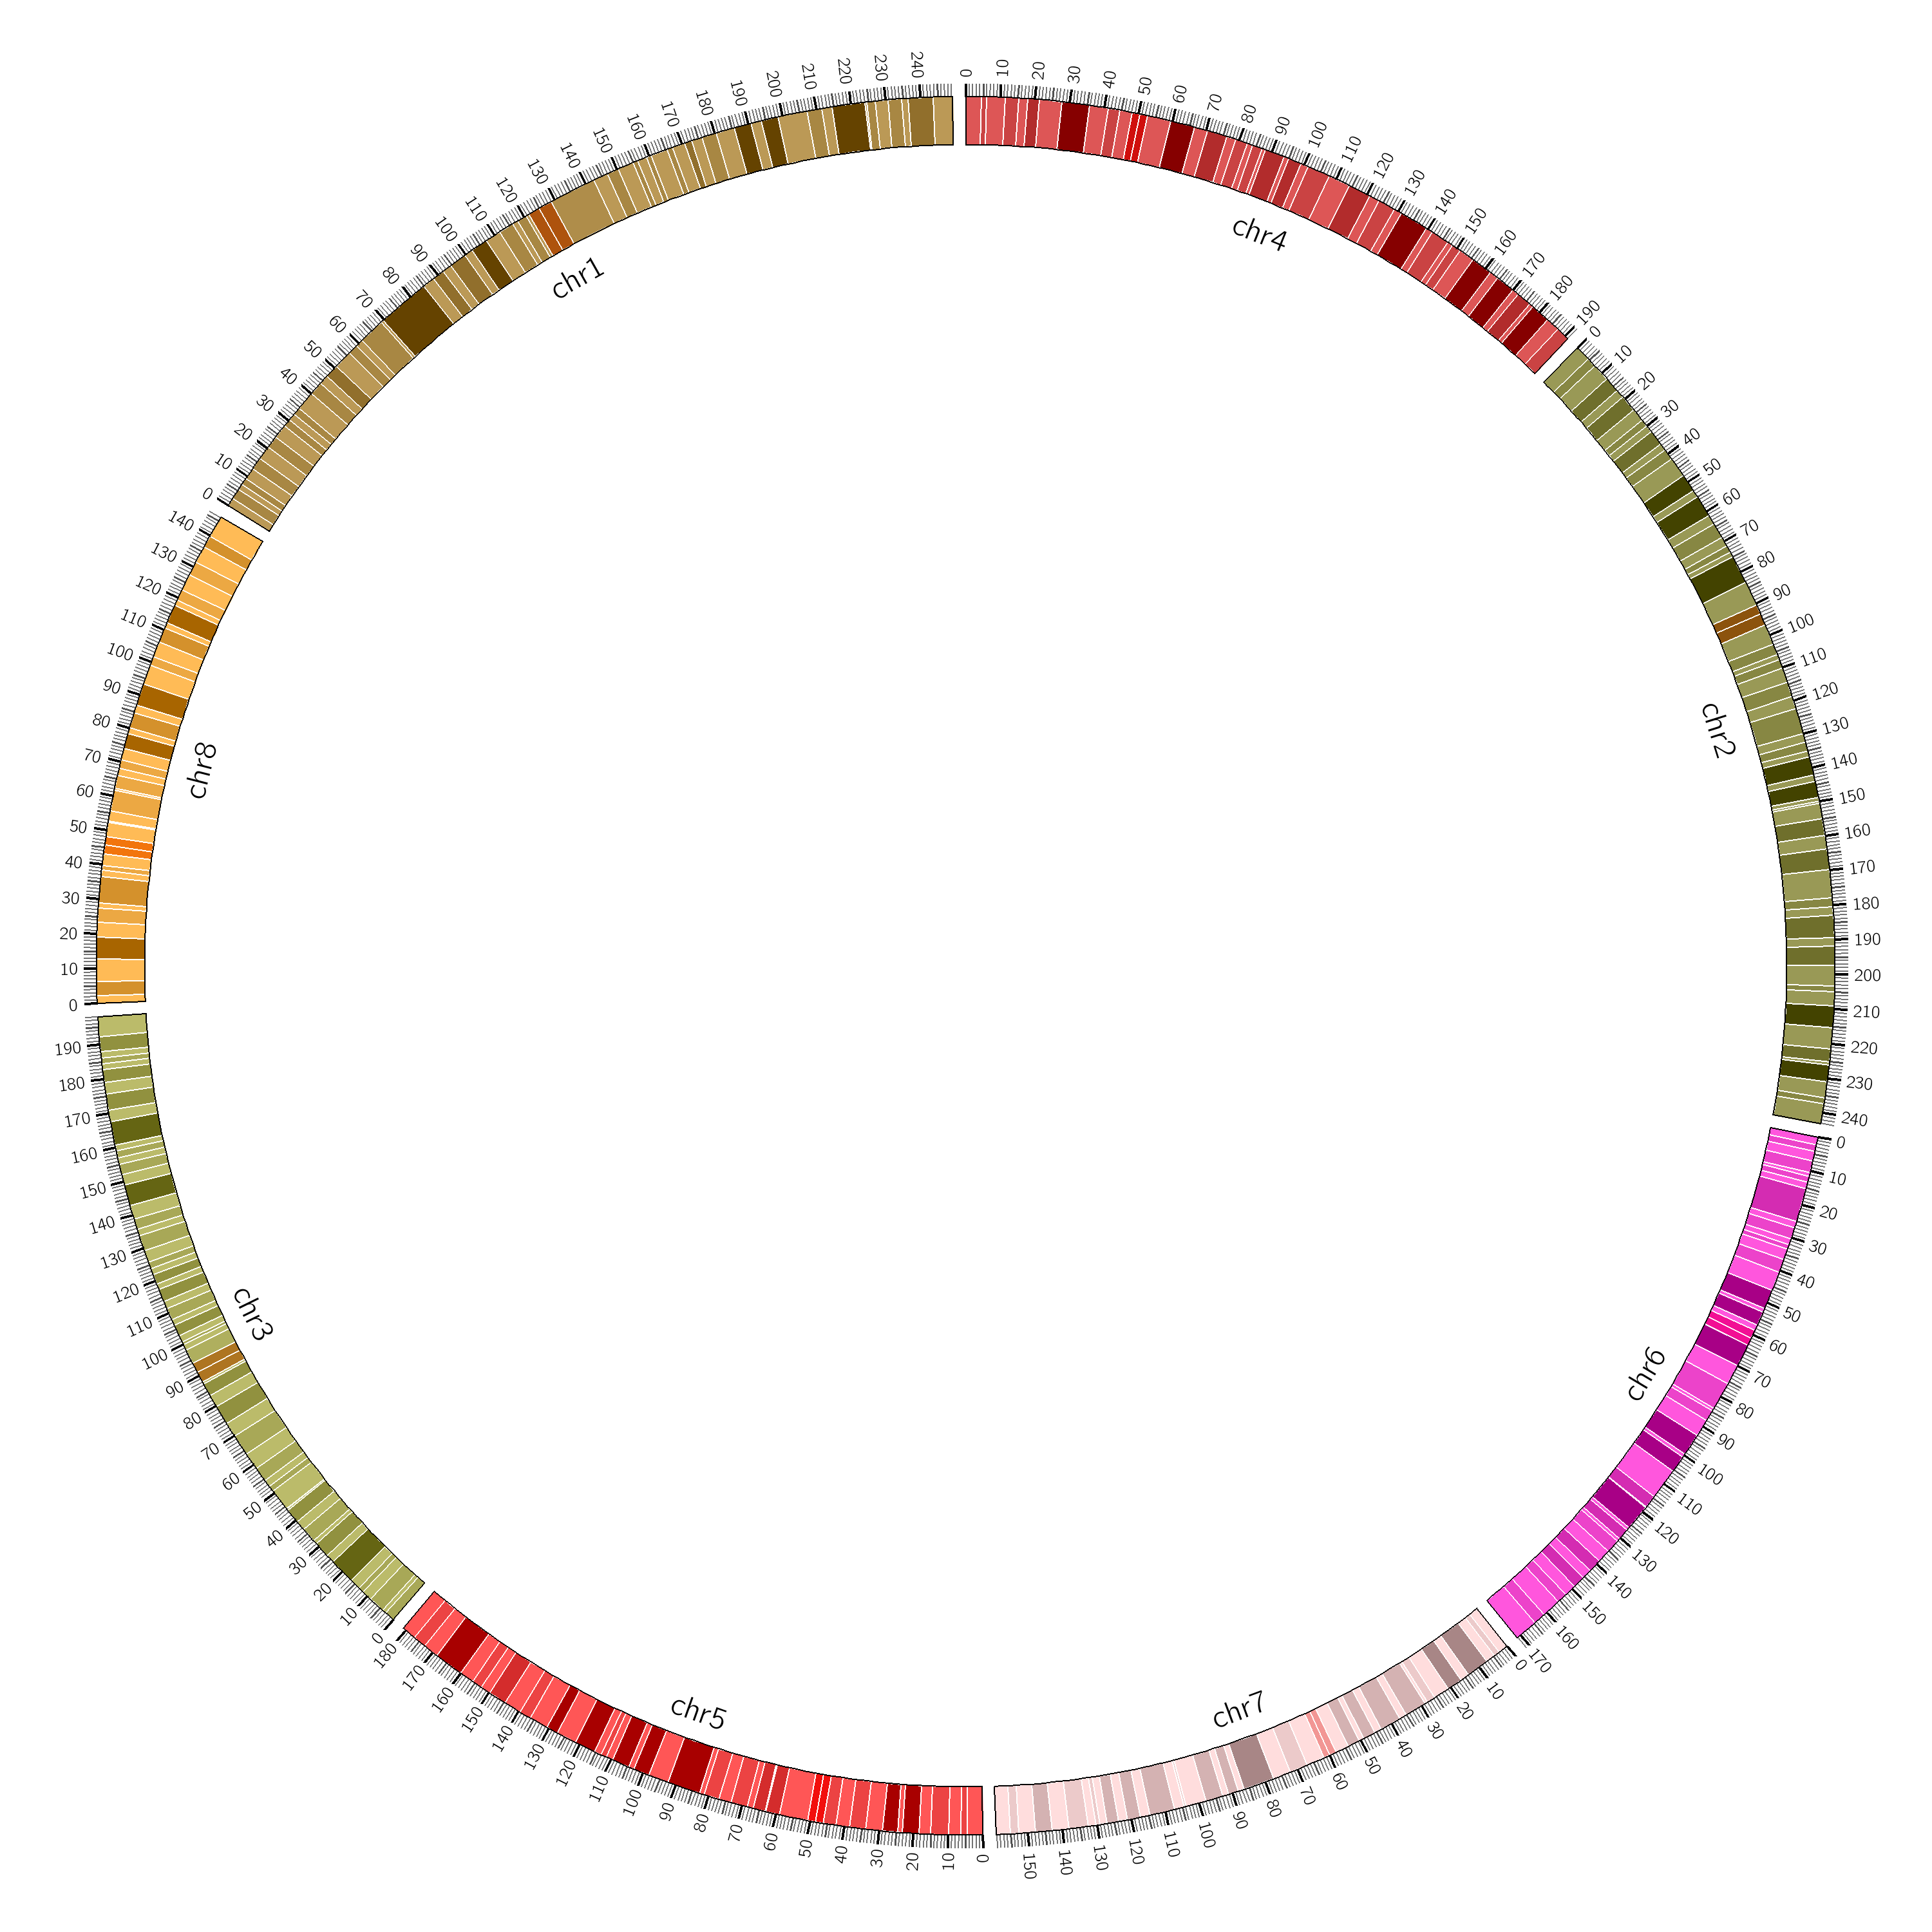

In [3]:
from IPython.display import Image
Image("circos.png")

----

Continue on to the next part of the Drawing Ideograms series by clicking [here &#10145;](Drawing_ideograms_Part5.ipynb).

----